In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as tsa
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [158]:
df_ob = pd.read_csv("round-1-island-data-bottle/prices_round_1_day_-2.csv", sep = ";")
df_ob = pd.concat([df_ob, pd.read_csv("round-1-island-data-bottle/prices_round_1_day_-1.csv", sep = ";")])
df_ob = pd.concat([df_ob, pd.read_csv("round-1-island-data-bottle/prices_round_1_day_0.csv", sep = ";")])
df_ob

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
19996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0
19997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
19998,0,999900,STARFRUIT,5048,2,5047.0,21.0,NaN,NaN,5054,23,NaN,NaN,NaN,NaN,5051.0,0.0


<Axes: >

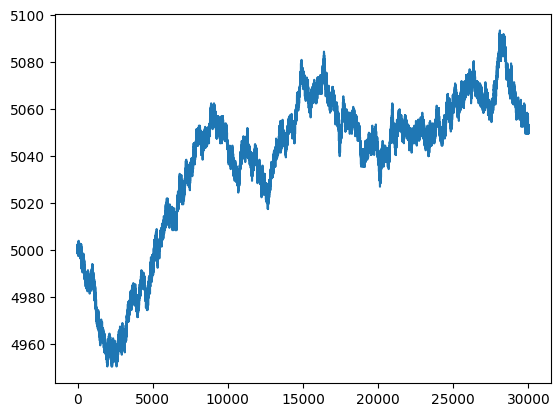

In [159]:
df_sf = df_ob[df_ob['product'] == 'STARFRUIT']['mid_price'].reset_index(drop=True)
df_sf.plot()

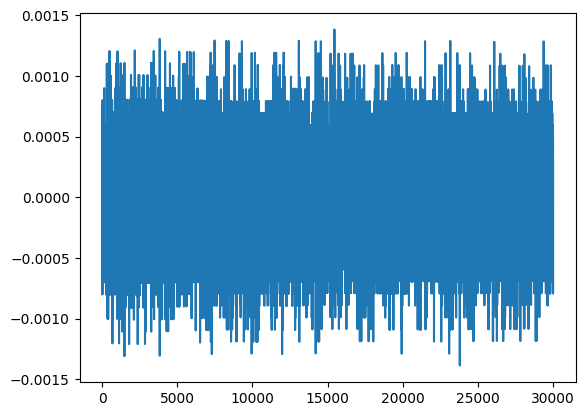

In [160]:
sf_pct = df_sf.pct_change()[1:].to_numpy()
plt.plot(sf_pct)

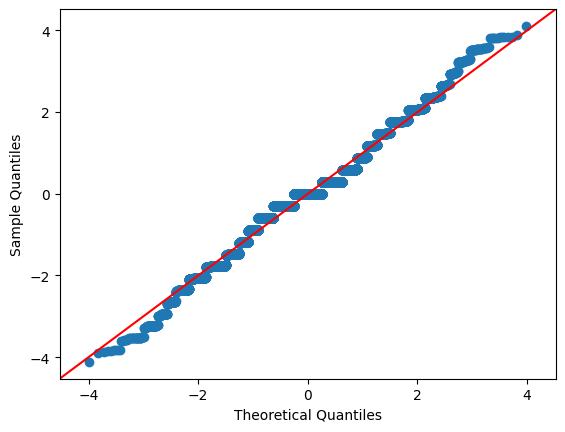

In [162]:
sm.qqplot(sf_pct, line='45', fit=True)
plt.show()

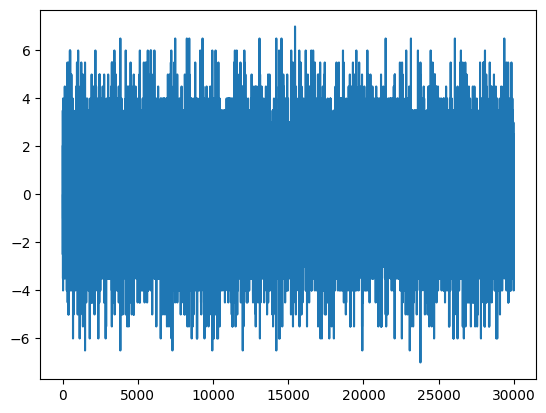

In [161]:
sf_diff = df_sf.diff()[1:].to_numpy()
plt.plot(sf_diff)

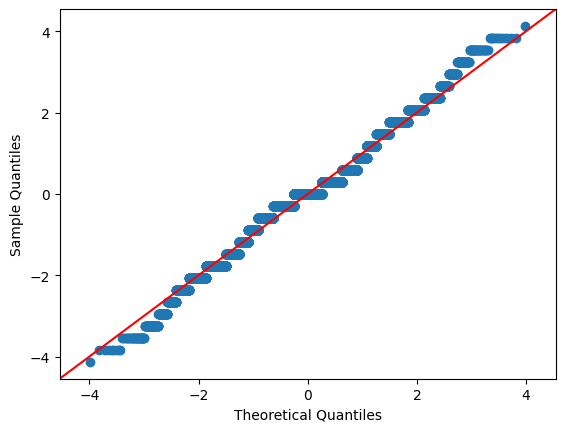

In [122]:
sm.qqplot(sf_diff, line='45', fit=True)
plt.show()

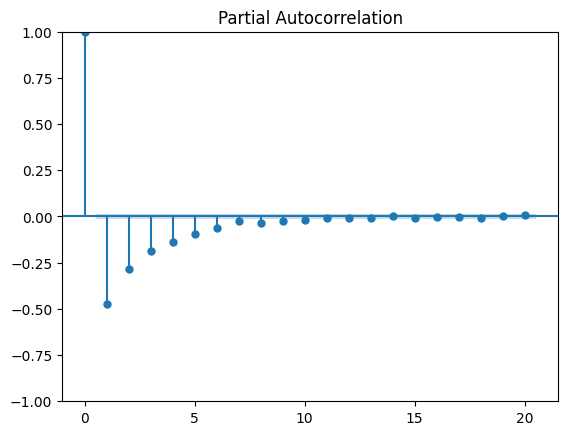

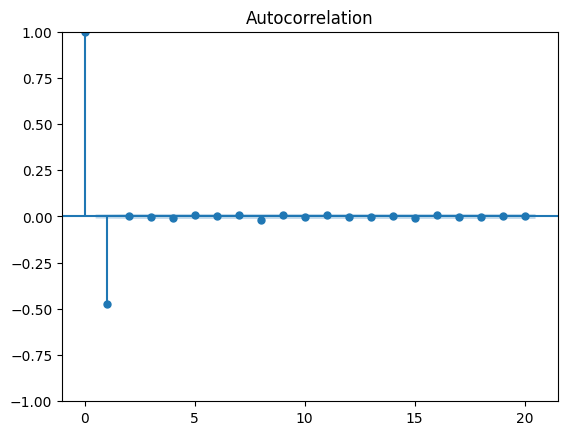

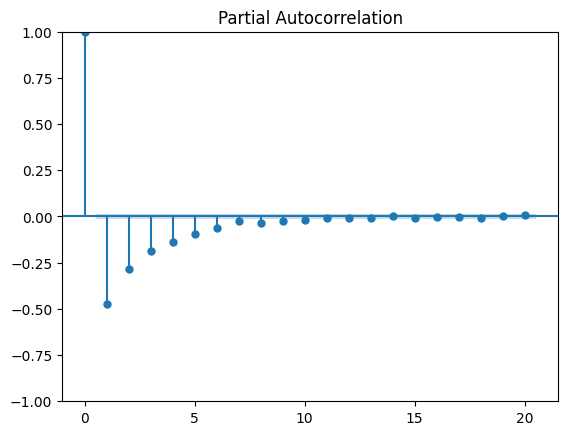

In [123]:
tsa.plot_acf(sf_diff, lags=20)
tsa.plot_pacf(sf_diff, lags=20)

Fitting AR(1) model

In [124]:
model = sm.tsa.ARIMA(sf_diff, order=(1, 0, 0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                29999
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -54625.626
Date:                Thu, 11 Apr 2024   AIC                         109257.253
Time:                        07:51:49   BIC                         109282.179
Sample:                             0   HQIC                        109265.251
                              - 29999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.006      0.283      0.778      -0.010       0.013
ar.L1         -0.4715      0.005   -104.283      0.000      -0.480      -0.463
sigma2         2.2343      0.016    141.642      0.000       2.203       2.265
===================================================================================
Ljung-Box (L1) (Q):                 532.40   Jarque-Bera (JB):               575.10
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.03
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

$$x_t = -0.47x_{t-1}$$

In [125]:
sim_ar_sf_diff = np.zeros(29_999)
sim_ar_sf_diff[0] = sf_diff[0]
for i in range(1, len(sim_ar_sf_diff)):
    sim_ar_sf_diff[i] = (round((sf_diff[i - 1] * -0.4715) * 2) / 2)
sim_ar_sf_diff

array([ 2. , -1. ,  1. , ...,  0.5, -1. ,  2. ])

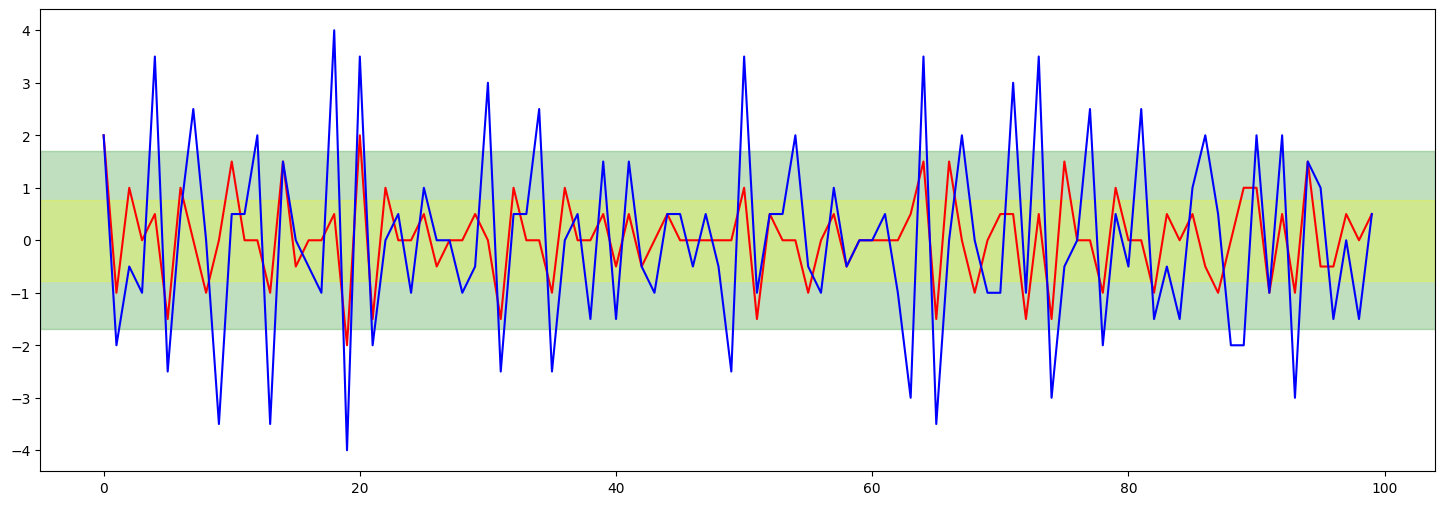

In [126]:
idx, idx2 = 0, 100
plt.figure(figsize=(18, 6))
plt.plot(sim_ar_sf_diff[idx:idx2], color='red')
std_sf_diff = np.std(sf_diff)
plt.plot(sf_diff[idx:idx2], color='blue')
plt.axhspan(-std_sf_diff, std_sf_diff, color='green', alpha=0.25)
std_ar_diff = np.std(sim_ar_sf_diff)
plt.axhspan(-std_ar_diff, std_ar_diff, color='yellow', alpha=0.25)
plt.show()

In [127]:
np.corrcoef(sim_ar_sf_diff, sf_diff)

array([[1.        , 0.46808557],
       [0.46808557, 1.        ]])

In [128]:
sf = df_sf.to_numpy()
sim_sf = np.zeros(len(sim_ar_sf_diff + 1))
sim_sf[0] = sf[0]
for i in range(1, len(sim_sf)):
    sim_sf[i] = sf[i - 1] + sim_ar_sf_diff[i - 1]
sim_sf

array([5000. , 5002. , 5001. , ..., 5052. , 5051.5, 5052.5])

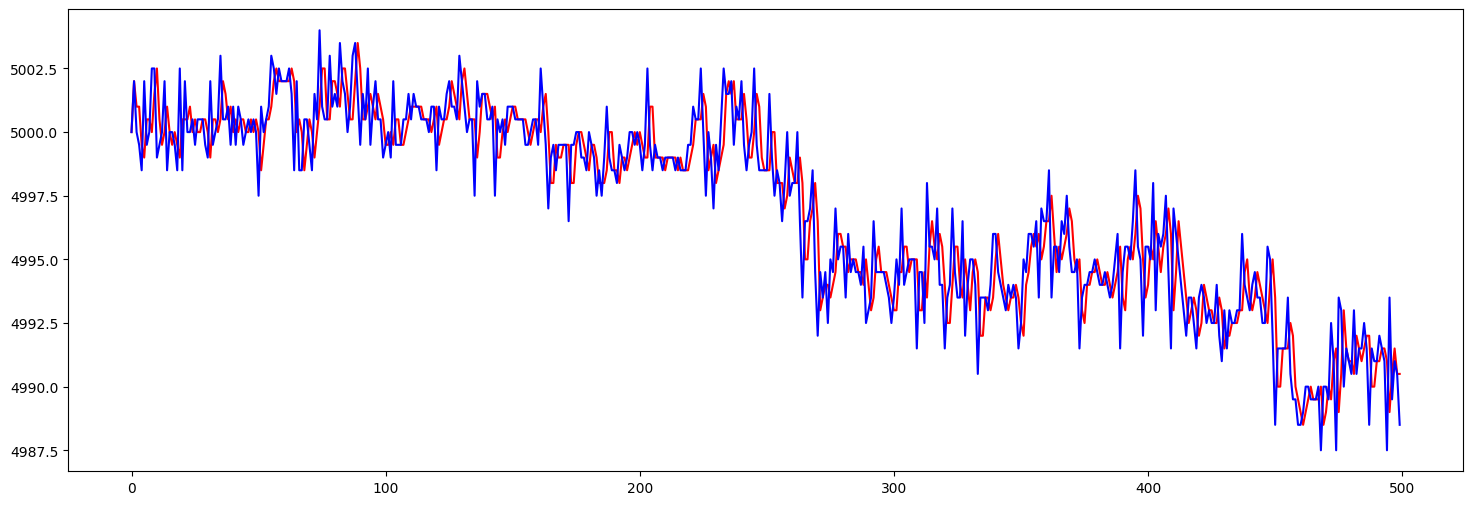

In [129]:
plt.figure(figsize=(18, 6))
plt.plot(sim_sf[:500], color='red')
plt.plot(sf[:500], color='blue')
plt.show()

Fitting MA(1) model

In [130]:
model = sm.tsa.ARIMA(sf_diff, order=(0, 0, 1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                29999
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -52301.970
Date:                Thu, 11 Apr 2024   AIC                         104609.940
Time:                        07:51:52   BIC                         104634.867
Sample:                             0   HQIC                        104617.938
                              - 29999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.002      0.727      0.467      -0.003       0.006
ma.L1         -0.7086      0.004   -176.839      0.000      -0.716      -0.701
sigma2         1.9136      0.013    146.410      0.000       1.888       1.939
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               929.04
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.03
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [131]:
sim_ma_sf_diff = np.zeros(29_999)
sim_ma_sf_diff[0] = sf_diff[0]
error = sim_ma_sf_diff[0] - sf_diff[0]
for i in range(1, len(sim_ma_sf_diff)):
    sim_ma_sf_diff[i] = int(round((error * -0.7096) * 2) / 2)
    error = sim_ma_sf_diff[i] - sf_diff[i]
sim_ma_sf_diff

array([ 2.,  0., -1., ..., -1.,  2., -4.])

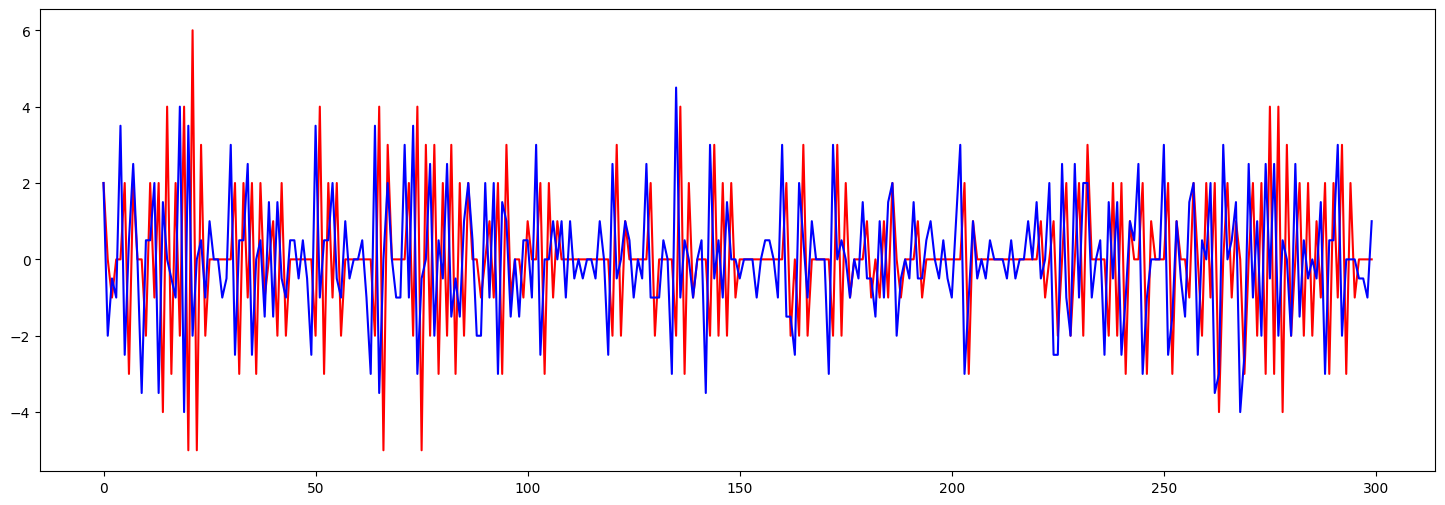

In [132]:
plt.figure(figsize=(18, 6))
plt.plot(sim_ma_sf_diff[:300], color='red')
plt.plot(sf_diff[:300], color='blue')
plt.show()

In [133]:
sf = df_sf.to_numpy()
sim_sf_ma = np.zeros(len(sim_ma_sf_diff + 1))
sim_sf_ma[0] = sf[0]
for i in range(1, len(sim_sf)):
    sim_sf_ma[i] = sf[i - 1] + sim_ma_sf_diff[i - 1]
sim_sf_ma

array([5000. , 5002. , 5002. , ..., 5052.5, 5050. , 5055.5])

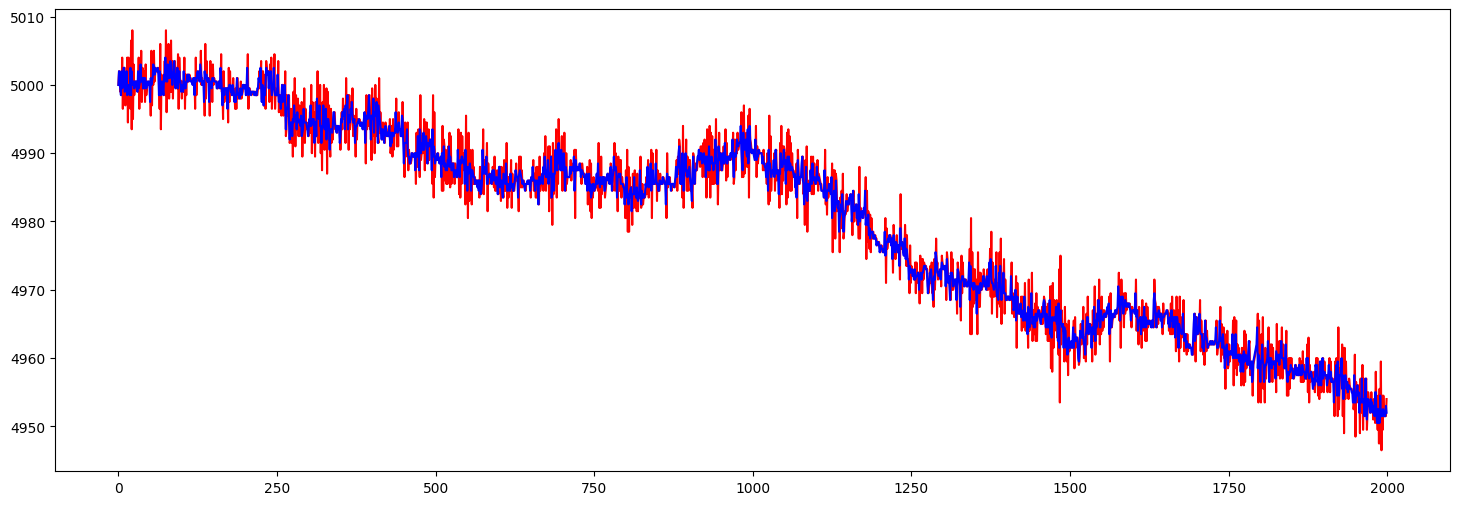

In [134]:
plt.figure(figsize=(18, 6))
plt.plot(sim_sf_ma[:2_000], color='red')
plt.plot(sf[:2_000], color='blue')
plt.show()

In [135]:
df_ob = pd.read_csv("round-1-island-data-bottle/prices_round_1_day_-2.csv", sep = ";")
df_ob = pd.concat([df_ob, pd.read_csv("round-1-island-data-bottle/prices_round_1_day_-1.csv", sep = ";")])
df_ob = pd.concat([df_ob, pd.read_csv("round-1-island-data-bottle/prices_round_1_day_0.csv", sep = ";")])

df_sf = df_ob[df_ob['product'] == 'STARFRUIT'].reset_index(drop=True)
df_sf.drop(['day', 'product', 'profit_and_loss'], axis=1, inplace=True)

df_sf.loc[:, 'total_bid_volume'] = 0
df_sf.loc[:, 'total_ask_volume'] = 0
df_sf.loc[:, 'total_volume'] = 0
df_sf.loc[:, 'imbal'] = 0
num = 3
for i in range(1, num + 1):
    df_sf.loc[:, f'bid_volume_{i}'] = df_sf[f'bid_volume_{i}'].fillna(0)
    df_sf.loc[:, 'total_bid_volume'] += df_sf[f'bid_volume_{i}']
    df_sf.loc[:, f'ask_volume_{i}'] = df_sf[f'ask_volume_{i}'].fillna(0)
    df_sf.loc[:, 'total_ask_volume'] += df_sf.loc[:, f'ask_volume_{i}']
df_sf.loc[:, 'total_volume'] += df_sf['total_bid_volume'] + df_sf['total_ask_volume'] 
df_sf.loc[:, 'imbal'] += df_sf['total_bid_volume'] - df_sf['total_ask_volume']
df_sf

,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,total_bid_volume,total_ask_volume,total_volume,imbal
0,0,4997,26,NaN,0.0,NaN,0.0,5003,26,NaN,0.0,NaN,0.0,5000.0,26,26,52,0
1,100,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,0.0,NaN,0.0,5002.0,31,20,51,11
2,200,4997,1,4996.0,30.0,NaN,0.0,5003,31,NaN,0.0,NaN,0.0,5000.0,31,31,62,0
3,300,4996,27,NaN,0.0,NaN,0.0,5003,27,NaN,0.0,NaN,0.0,4999.5,27,27,54,0
4,400,4995,20,NaN,0.0,NaN,0.0,5002,20,NaN,0.0,NaN,0.0,4998.5,20,20,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,999500,5049,28,NaN,0.0,NaN,0.0,5056,28,NaN,0.0,NaN,0.0,5052.5,28,28,56,0
29996,999600,5048,9,5047.0,27.0,NaN,0.0,5054,29,NaN,0.0,NaN,0.0,5051.0,36,29,65,7
29997,999700,5053,1,5048.0,26.0,NaN,0.0,5054,2,5055.0,24.0,NaN,0.0,5053.5,27,26,53,1
29998,999800,5047,27,NaN,0.0,NaN,0.0,5052,1,5054.0,27.0,NaN,0.0,5049.5,27,28,55,-1


In [136]:
df_sf['imbal'].describe(), df_sf['imbal'].kurt()

(count    30000.000000
 mean         0.033200
 std          3.506942
 min        -25.000000
 25%          0.000000
 50%          0.000000
 75%          1.000000
 max         25.000000
 Name: imbal, dtype: float64,
 4.072959111087632)

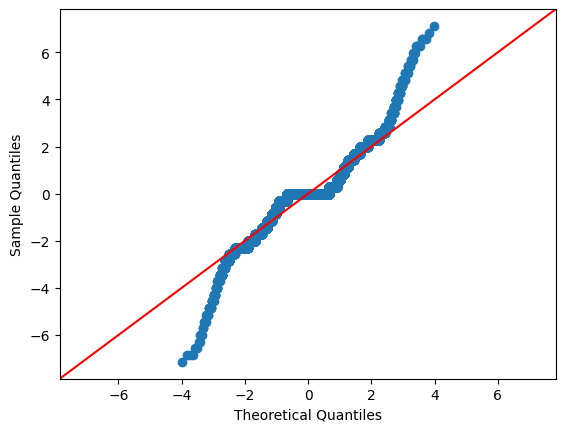

In [137]:
sm.qqplot(df_sf['imbal'], line='45', fit=True)
plt.show()

In [146]:
df_sf['imbal_2diff'] = df_sf['imbal'].diff().diff()
df_sf['imbal_2diff_1lag'] = df_sf['imbal_2diff'].shift(1)
df_sf

,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,total_bid_volume,total_ask_volume,total_volume,imbal,imbal_2diff,imbal_2diff_1lag
0,0,4997,26,NaN,0.0,NaN,0.0,5003,26,NaN,0.0,NaN,0.0,5000.0,26,26,52,0,NaN,NaN
1,100,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,0.0,NaN,0.0,5002.0,31,20,51,11,NaN,NaN
2,200,4997,1,4996.0,30.0,NaN,0.0,5003,31,NaN,0.0,NaN,0.0,5000.0,31,31,62,0,-22.0,NaN
3,300,4996,27,NaN,0.0,NaN,0.0,5003,27,NaN,0.0,NaN,0.0,4999.5,27,27,54,0,11.0,-22.0
4,400,4995,20,NaN,0.0,NaN,0.0,5002,20,NaN,0.0,NaN,0.0,4998.5,20,20,40,0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,999500,5049,28,NaN,0.0,NaN,0.0,5056,28,NaN,0.0,NaN,0.0,5052.5,28,28,56,0,4.0,-10.0
29996,999600,5048,9,5047.0,27.0,NaN,0.0,5054,29,NaN,0.0,NaN,0.0,5051.0,36,29,65,7,7.0,4.0
29997,999700,5053,1,5048.0,26.0,NaN,0.0,5054,2,5055.0,24.0,NaN,0.0,5053.5,27,26,53,1,-13.0,7.0
29998,999800,5047,27,NaN,0.0,NaN,0.0,5052,1,5054.0,27.0,NaN,0.0,5049.5,27,28,55,-1,4.0,-13.0


Fitting ARX(2) model

In [148]:
imbal_2diff_1lag = df_sf['imbal_2diff_1lag'].dropna().to_numpy()
len(imbal_2diff_1lag)

29997

$$x_t = \alpha_1 x_{t-1} + \beta_1 y_{t-1}$$

In [149]:
model = sm.tsa.ARIMA(sf_diff[2:], order=(1, 0, 0), exog=imbal_2diff_1lag)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                29997
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -54589.399
Date:                Thu, 11 Apr 2024   AIC                         109186.798
Time:                        08:06:39   BIC                         109220.033
Sample:                             0   HQIC                        109197.462
                              - 29997                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.006      0.291      0.771      -0.010       0.013
x1             0.0115      0.001      8.352      0.000       0.009       0.014
ar.L1         -0.4895      0.005    -98.925      0.000      -0.499      -0.480
sigma2         2.2295      0.016    141.745      0.000       2.199       2.260
===================================================================================
Ljung-Box (L1) (Q):                 556.50   Jarque-Bera (JB):               582.40
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.03
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [151]:
sim_arx_sf_diff = np.zeros(29_999)
sim_arx_sf_diff[0] = sf_diff[0]
sim_arx_sf_diff[1] = sf_diff[1]

for i in range(2, len(sim_arx_sf_diff)):
    sim_arx_sf_diff[i] = (round((sf_diff[i - 1] * -0.4895 + imbal_2diff_1lag[i - 2] * 0.0115) * 2) / 2)
sim_ar_sf_diff

array([ 2. , -1. ,  1. , ...,  0.5, -1. ,  2. ])

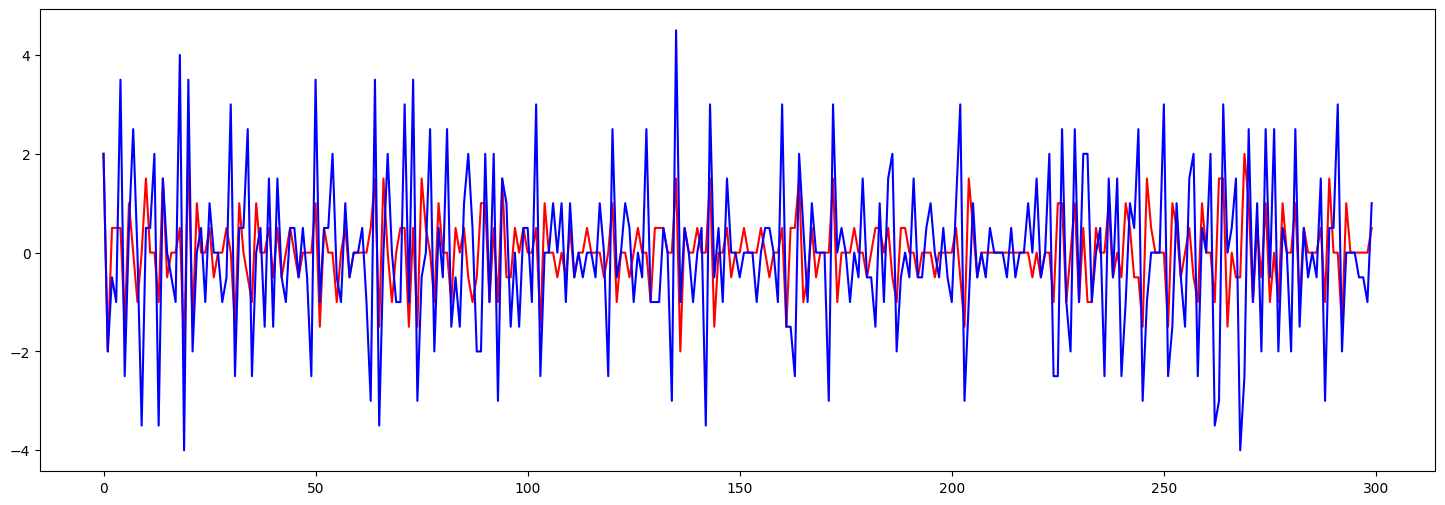

In [152]:
plt.figure(figsize=(18, 6))
plt.plot(sim_arx_sf_diff[:300], color='red')
plt.plot(sf_diff[:300], color='blue')
plt.show()

In [154]:
sf = df_sf['mid_price'].to_numpy()
sim_sf_arx = np.zeros(len(sim_arx_sf_diff + 1))
sim_sf_arx[0] = sf[0]
for i in range(1, len(sim_sf)):
    sim_sf_arx[i] = sf[i - 1] + sim_arx_sf_diff[i - 1]
sim_sf_arx

array([5000., 5002., 5000., ..., 5052., 5052., 5052.])

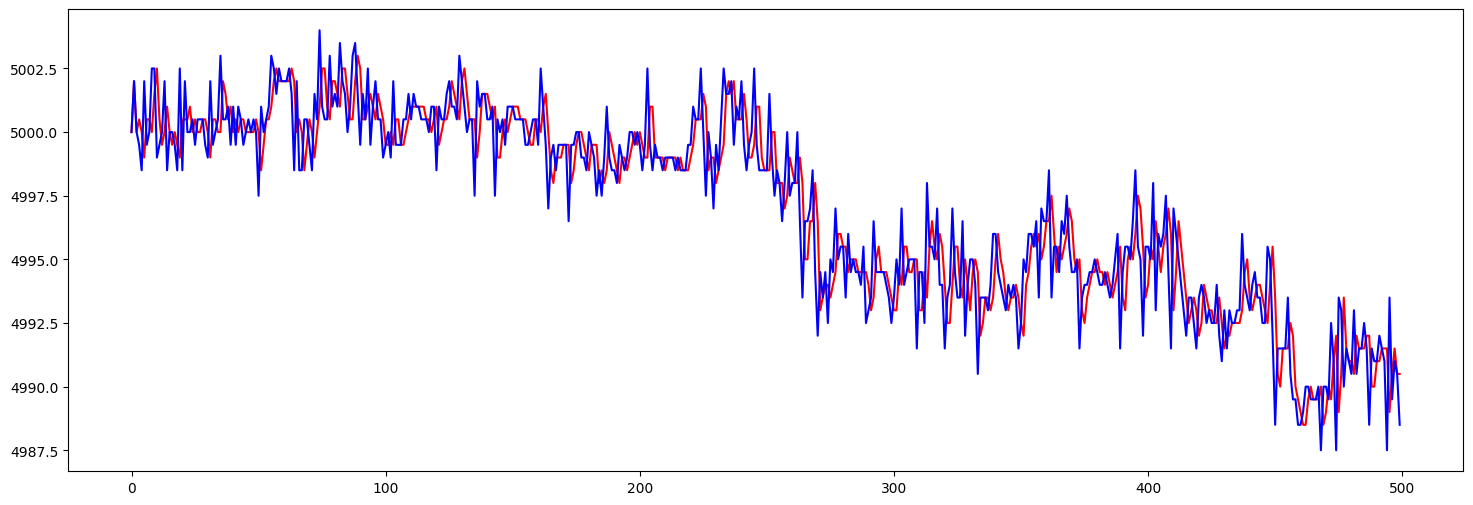

In [156]:
plt.figure(figsize=(18, 6))
plt.plot(sim_sf_arx[:500], color='red')
plt.plot(sf[:500], color='blue')
plt.show()